In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-np.pi / 2, np.pi / 2)
T = (np.sin(X) + 1) / 2
n_data = len(T)

In [2]:
#正向传播
def forward(x, w, b):
    u = x * w + b
    y = 1 / (1 + np.exp(-u))
    return y
#反向传播
def backward(x, y, t):
    delta = (y - t) * (1 - y) * y
    grad_w = x * delta
    grad_b = delta
    return grad_w, grad_b

In [3]:
def show_output(X, Y, T, epoch):
    plt.plot(X, T, linestyle="dashed")
    plt.scatter(X, Y, marker="+")
    plt.xlabel("x", size=14)
    plt.ylabel("y", size=14)
    plt.grid()
    plt.show()
    print("Epoch:", epoch)
    print("Error:", 1/2*np.sum((Y-T)**2))

In [11]:
# --- 固定值---
eta = 0.0005
epoch = 100000
# --- 初始值---
w = 0.2
b = -0.2

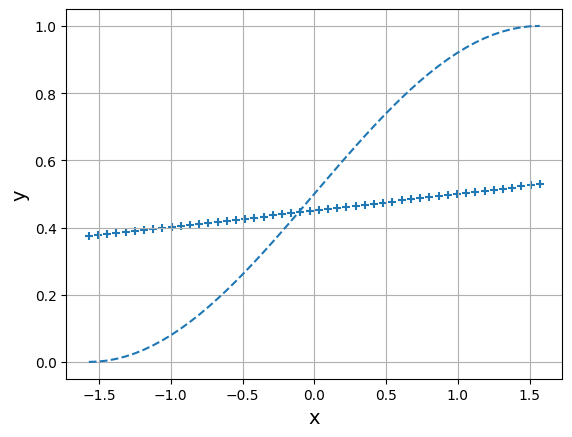

Epoch: 0
Error: 2.4930145826202508


In [12]:
# --- 学习---
for i in range(epoch):
    if i < 1:
        Y = forward(X, w, b)
        show_output(X, Y, T, i)
    idx_rand = np.arange(n_data)
    np.random.shuffle(idx_rand)
    for j in idx_rand:
        x = X[j]
    t = T[j]
    y = forward(x, w, b)
    grad_w,grad_b = backward(x, y, t)
    w -= eta * grad_w
    b -= eta * grad_b

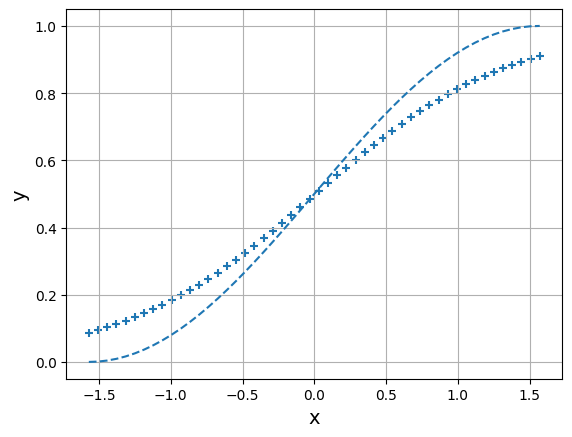

Epoch: 100000
Error: 0.171547442289544


In [13]:
# --- 显示最终结果---
Y = forward(X, w, b)
show_output(X, Y, T, epoch)